# Walmart Sales: Exploration Data Analysis

<img src='walmart_app.jpg' alt='Walmart App' width='600'>

Made by [Zalfy Putra Rezky](https://www.linkedin.com/in/zalfyputra/)

An EDA report that aims to uncover patterns and insights within a Walmart sales dataset, examining factors such as weekly sales, holiday effects, weather conditions, and economic indicators like fuel prices and CPI. This report includes data cleaning, feature engineering, and hypothesis testing to better understand the relationships between these variables and their impact on sales performance.

## Dataset Summary <a id='dataset_summary'></a>

The [Walmart Sales Dataset](https://www.kaggle.com/datasets/yasserh/walmart-dataset) contains historical sales data from Walmart stores spanning from February 5, 2010, to November 1, 2012, encompassing variables such as store number, weekly sales, holiday indicators, and environmental factors like temperature, fuel prices, and Consumer Price Index (CPI).

### Dataset Description

- **Store**: The store number.
- **Date**: The date of the sale.
- **Weekly_Sales**: The sales for the given store on the given date.
- **Holiday_Flag**: Whether the week is a special holiday week (1 – Holiday week, 0 – Non-holiday week).
- **Temperature**: Temperature on the day of sale.
- **Fuel_Price**: Cost of fuel in the region.
- **CPI**: Prevailing consumer price index.
- **Unemployment**: Prevailing unemployment rate.

## Data Reading

### Importing Libraries

For this analysis, we will use the following libraries:
- `pandas` for managing the data.
- `numpy` for mathematical operations.
- `matplotlib` for visualizing the data.
- `seaborn` for visualizing the data.
- `scipy.stats` for statistical analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats 

### Understanding the Data

Reading the dataset as a dataframe

In [2]:
df = pd.read_csv('walmart_sales.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


Check All Columns

In [3]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

Check how many rows and columns are there in the dataset

In [4]:
df.shape

(6435, 8)

Showing the first 5 rows of the dataset

In [5]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


Showing the last 5 rows of the dataset

In [6]:
df.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


Number of unique values in each column

In [7]:
df.nunique().sort_values()

Holiday_Flag       2
Store             45
Date             143
Unemployment     349
Fuel_Price       892
CPI             2145
Temperature     3528
Weekly_Sales    6435
dtype: int64

## Exploratory Data Analysis (EDA)

### Data Cleaning

Check for null values in the dataset

In [8]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

Check for duplicate rows

In [9]:
print(df[df.duplicated()])

Empty DataFrame
Columns: [Store, Date, Weekly_Sales, Holiday_Flag, Temperature, Fuel_Price, CPI, Unemployment]
Index: []


Calculate the range for each numerical column

In [10]:
df_clean = df.drop(columns=['Date'])

sales_stats = df_clean.describe()
sales_stats.loc['range'] = sales_stats.loc['max'] - sales_stats.loc['min']
output_rows = ['count','std','min','mean','25%','50%','75%','max','range']

sales_stats = sales_stats.loc[output_rows]
sales_stats.rename({'50%': 'median'}, inplace=True)
sales_stats

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
median,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000
range,44.000000,3.608700e+06,1.000000,102.200000,1.996000,101.168807,10.434000


### Feature Engineering

Convert the Date column to datetime format

In [11]:
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")
df.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

Split the Date column into 3 columns

In [12]:
df['Day'] = (df['Date']).dt.day
df['Year'] = (df['Date']).dt.year
df[['Day', 'Year']].dtypes

Day     int32
Year    int32
dtype: object

Convert the Month column to contain the month name

In [13]:
df['Month'] = (df['Date']).dt.month_name()
df[['Month']].dtypes

Month    object
dtype: object

Log transforming skew variables

In [14]:
mask = df.dtypes == float
float_cols = df.columns[mask]

skew_limit = 0.75
skew_vals = df[float_cols].skew()
skew_vals

Weekly_Sales    0.668362
Temperature    -0.336768
Fuel_Price     -0.096158
CPI             0.063492
Unemployment    1.188144
dtype: float64

Showing the skewed columns

In [15]:
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))
skew_cols

,Skew
Unemployment,1.188144


One-hot encoding for dummy variables

In [16]:
df.select_dtypes('number')

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,5,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,12,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,19,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,26,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,5,2010
...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,28,2012
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,5,2012
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,12,2012
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,19,2012


In [17]:
df_sales = pd.get_dummies(df, columns=['Store', 'Weekly_Sales', 'Temperature'])
df_sales.head()

,Date,Holiday_Flag,Fuel_Price,CPI,Unemployment,Day,Year,Month,Store_1,Store_2,...,Temperature_97.18,Temperature_97.6,Temperature_97.66,Temperature_98.15,Temperature_98.43,Temperature_99.2,Temperature_99.22,Temperature_99.66,Temperature_100.07,Temperature_100.14
0,2010-02-05,0,2.572,211.096358,8.106,5,2010,February,True,False,...,False,False,False,False,False,False,False,False,False,False
1,2010-02-12,1,2.548,211.242170,8.106,12,2010,February,True,False,...,False,False,False,False,False,False,False,False,False,False
2,2010-02-19,0,2.514,211.289143,8.106,19,2010,February,True,False,...,False,False,False,False,False,False,False,False,False,False
3,2010-02-26,0,2.561,211.319643,8.106,26,2010,February,True,False,...,False,False,False,False,False,False,False,False,False,False
4,2010-03-05,0,2.625,211.350143,8.106,5,2010,March,True,False,...,False,False,False,False,False,False,False,False,False,False


### Data Visualization

**Total yearly and monthly sales**

In [18]:
yearly_sales = df.groupby('Year')['Weekly_Sales'].sum()
yearly_sales.sort_values(ascending=False).to_frame()

,Weekly_Sales
Year,
2011,2.448200e+09
2010,2.288886e+09
2012,2.000133e+09


In [19]:
monthly_sales = df.groupby('Month')['Weekly_Sales'].sum()
monthly_sales.sort_values(ascending=False).to_frame()

,Weekly_Sales
Month,
July,6.500010e+08
April,6.468598e+08
June,6.226299e+08
August,6.130902e+08
March,5.927859e+08
October,5.847848e+08
September,5.787612e+08
December,5.768386e+08
February,5.687279e+08


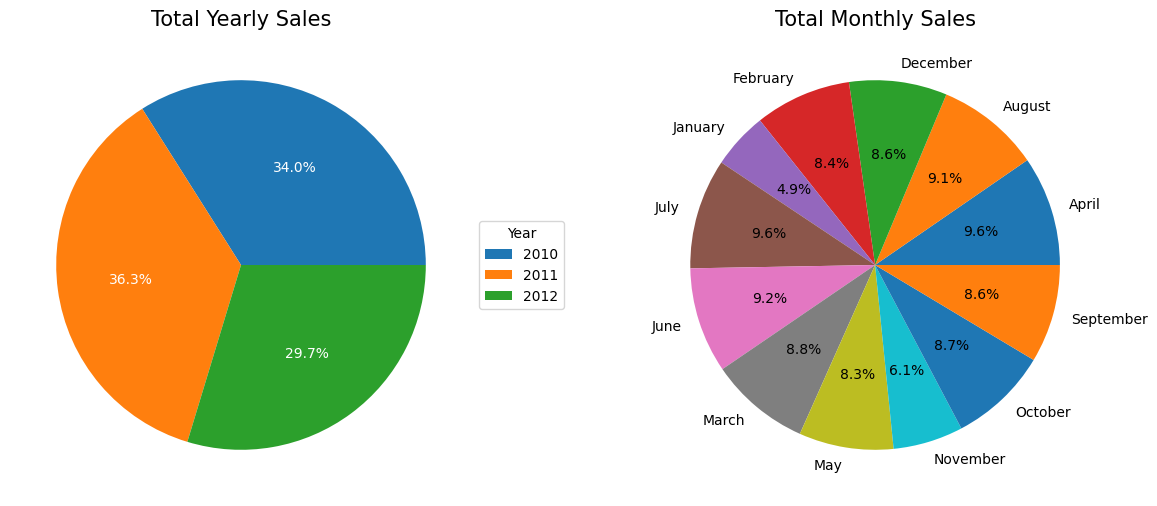

In [20]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plotting yearly sales pie chart
axes[0].pie(yearly_sales.values, autopct='%1.1f%%', textprops=dict(color="w"))
axes[0].set_title("Total Yearly Sales", fontsize=15)
axes[0].legend(yearly_sales.index.astype(str), title="Year", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Plotting monthly sales pie chart
axes[1].pie(monthly_sales.values, labels=monthly_sales.index, autopct='%1.1f%%')
axes[1].set_title("Total Monthly Sales", fontsize=15)

# Equal aspect ratio ensures that pie is drawn as a circle
axes[0].set_aspect('equal')
axes[1].set_aspect('equal')

# Show the plots
plt.show()

Most yearly sales happened in 2011 with 36% of the total yearly sales over three years. In 2010, sales accounted for 34% of the total. The most recent year, 2012, had the lowest share of yearly sales with 29%. The highest monthly sales occurred in July, followed by April and June. The lowest monthly sales were in November and January. This happens due to the challenges associated with the "4th quarter sales," marked by decreased consumer spending post-holiday season, reduced foot traffic, and a shift towards budget-conscious shopping habits after holiday expenses.

In [21]:
holiday_counts = df.groupby(['Year', 'Holiday_Flag']).size().unstack()
holiday_counts

Holiday_Flag,0,1
Year,,
2010,1980,180
2011,2160,180
2012,1845,90


The prevalence of non-holiday weeks, notably in 2011 with 2160 weeks, drove the year's sales to represent 36% of the total over three years. Despite potential sales boosts during holiday weeks due to price reductions, their frequency compared to non-holiday weeks resulted in a higher cumulative sales volume during regular periods.

**Distribution of the numerical columns**

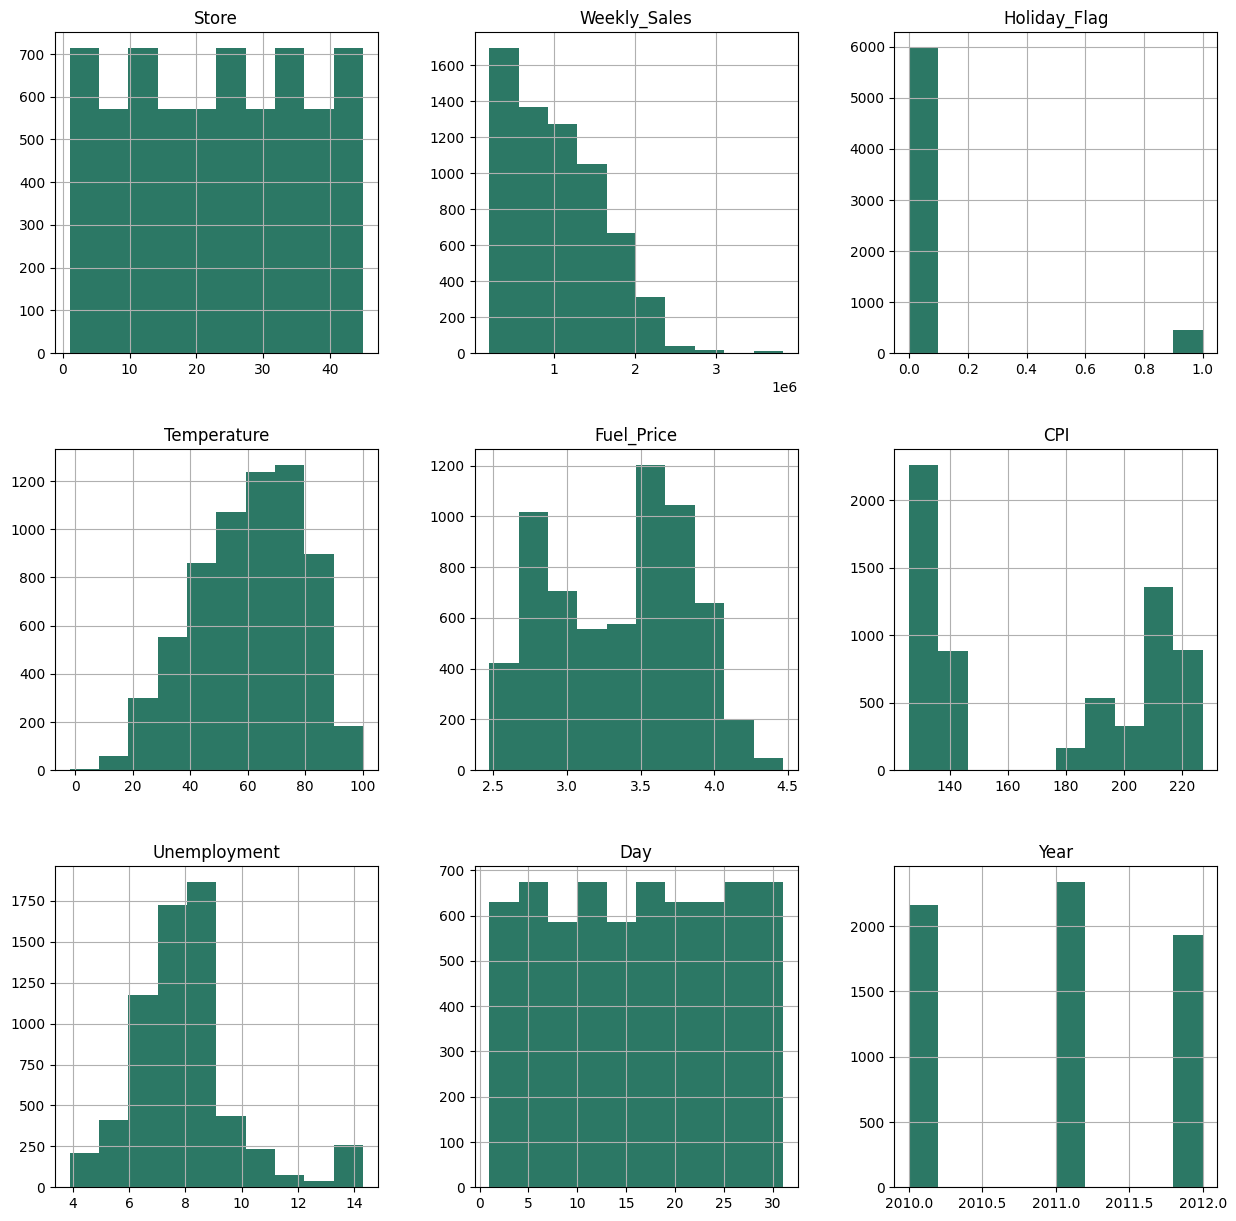

In [22]:
df.drop(columns=['Date']).hist(figsize=(15,15), color='#2C7865')
plt.show()

Based on the histograms above, we conclude the following:
- Transactions were relatively evenly distributed among different stores and years.
- Weekly sales exhibit a right-skewed distribution, with only a limited number of instances surpassing 2 million USD.
- Temperature follows an approximately normal distribution.
- Fuel prices display a bimodal distribution.
- CPI data shows the formation of two distinct clusters.
- The unemployment rate distribution closely resembles a normal distribution.

**Distribution of numerical columns corresponding to Holiday or Non-Holiday week**

In [23]:
holiday_sales = df.groupby('Holiday_Flag')['Weekly_Sales'].sum().to_frame()
holiday_sales

,Weekly_Sales
Holiday_Flag,
0,6.231919e+09
1,5.052996e+08


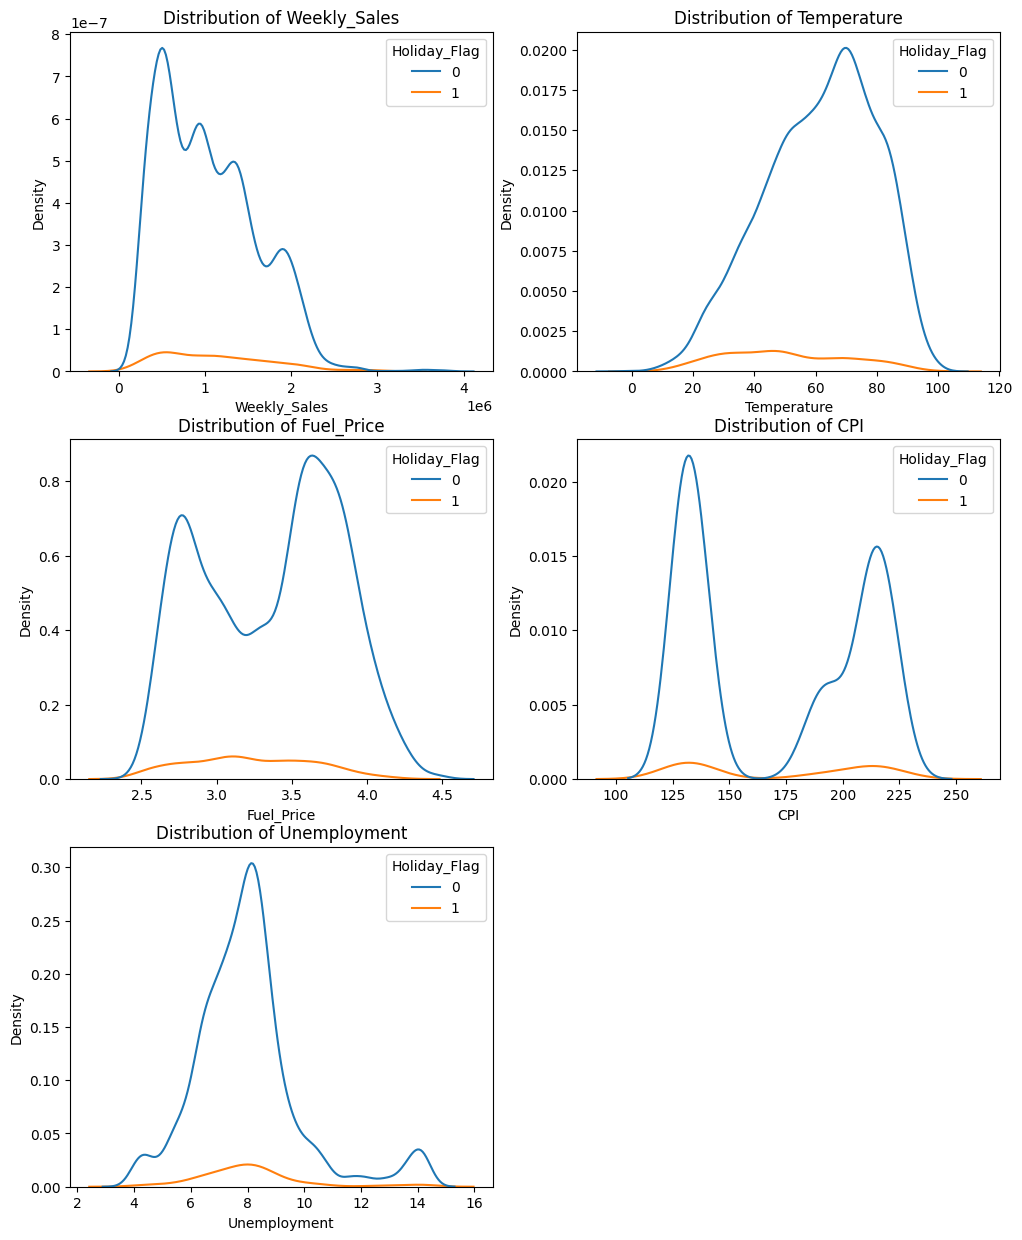

In [24]:
plt.figure(figsize=(12,15)) 
dist_cols=['Weekly_Sales', 'Temperature','Fuel_Price', 'CPI', 'Unemployment']
for i in range(0,len(dist_cols)):
    figure= plt.subplot(3,2,i+1)
    sns.kdeplot(data=df_clean, x=dist_cols[i], hue='Holiday_Flag')
    plt.title(f'Distribution of {dist_cols[i]}')

**Distribution of weekly sales**

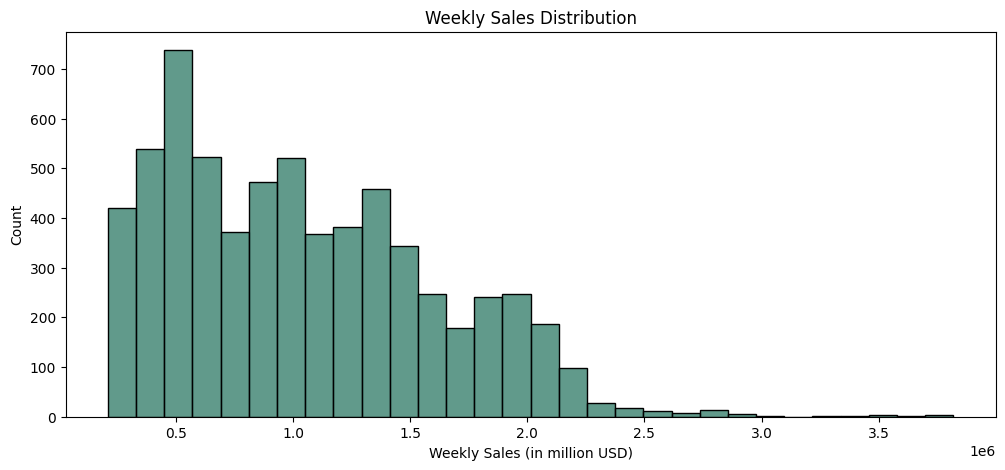

In [25]:
plt.figure(figsize=[12,5])
sns.histplot(df['Weekly_Sales'], bins=30, color='#2C7865', edgecolor="black")
plt.title('Weekly Sales Distribution')
plt.xlabel('Weekly Sales (in million USD)')
plt.show()

**Weekly sales trend**

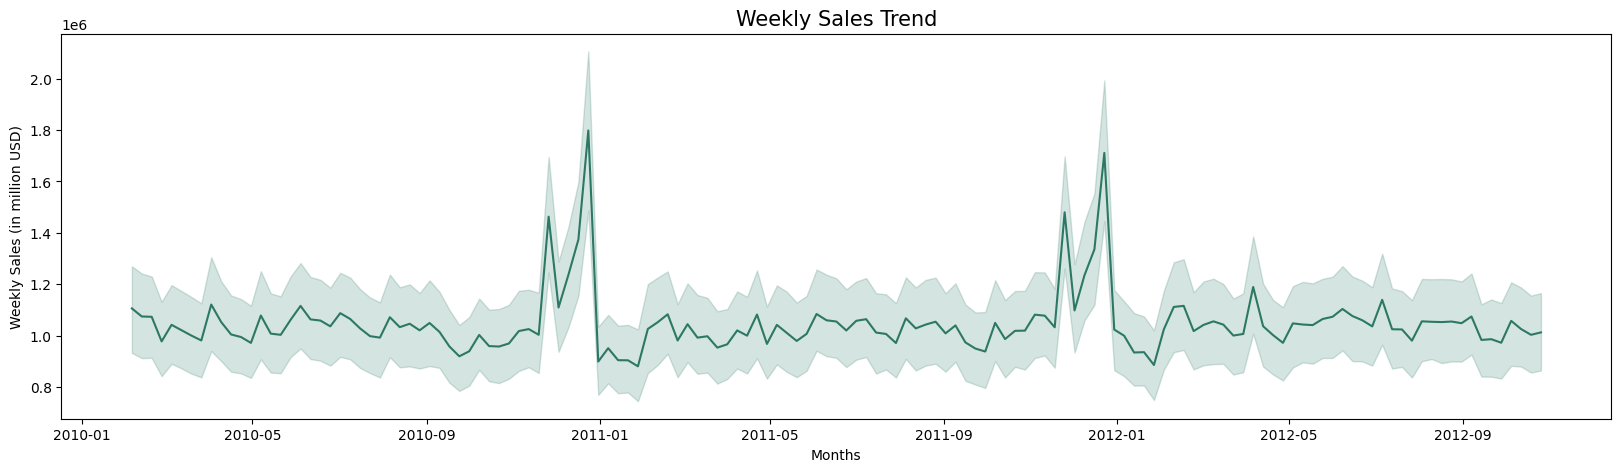

In [26]:
plt.figure(figsize=(20,5))
sns.lineplot(x=df['Date'], y=(df['Weekly_Sales']), color='#2C7865')
plt.xlabel('Months')
plt.ylabel('Weekly Sales (in million USD)')
plt.title('Weekly Sales Trend', fontsize=15)
plt.show()

**Total sales every month**

In [27]:
sales=df.groupby(['Year','Month'])['Weekly_Sales'].sum().to_frame()
df_sales=pd.DataFrame(sales)
df_sales=df_sales.reset_index()
df_sales

,Year,Month,Weekly_Sales
0,2010,April,2.314124e+08
1,2010,August,1.876401e+08
2,2010,December,2.887605e+08
3,2010,February,1.903330e+08
4,2010,July,2.325801e+08
5,2010,June,1.922462e+08
6,2010,March,1.819198e+08
7,2010,May,1.867109e+08
8,2010,November,2.028534e+08
9,2010,October,2.171618e+08


**Total sales over three years**

Text(0.5, 1.0, 'Total sales over the three years')

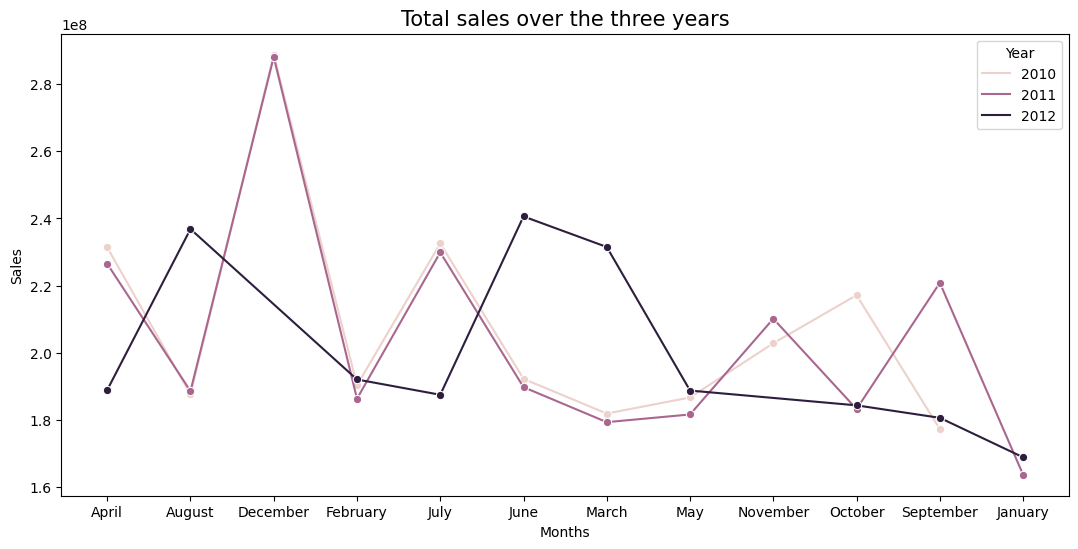

In [28]:
plt.figure(figsize=(13,6))
p=sns.lineplot(data=df_sales, x='Month', y='Weekly_Sales', hue='Year', marker='o')
plt.xlabel("Months")
plt.ylabel("Sales")
plt.title('Total sales over the three years', fontsize=15)

In 2010 and 2011, the sales trend was relatively similar, with a slight increase in sales during November 2010, while in 2011 happens later in October. In 2012, the sales trend was more volatile, with a significant increase in sales during June and August.

**Pairplot of features**

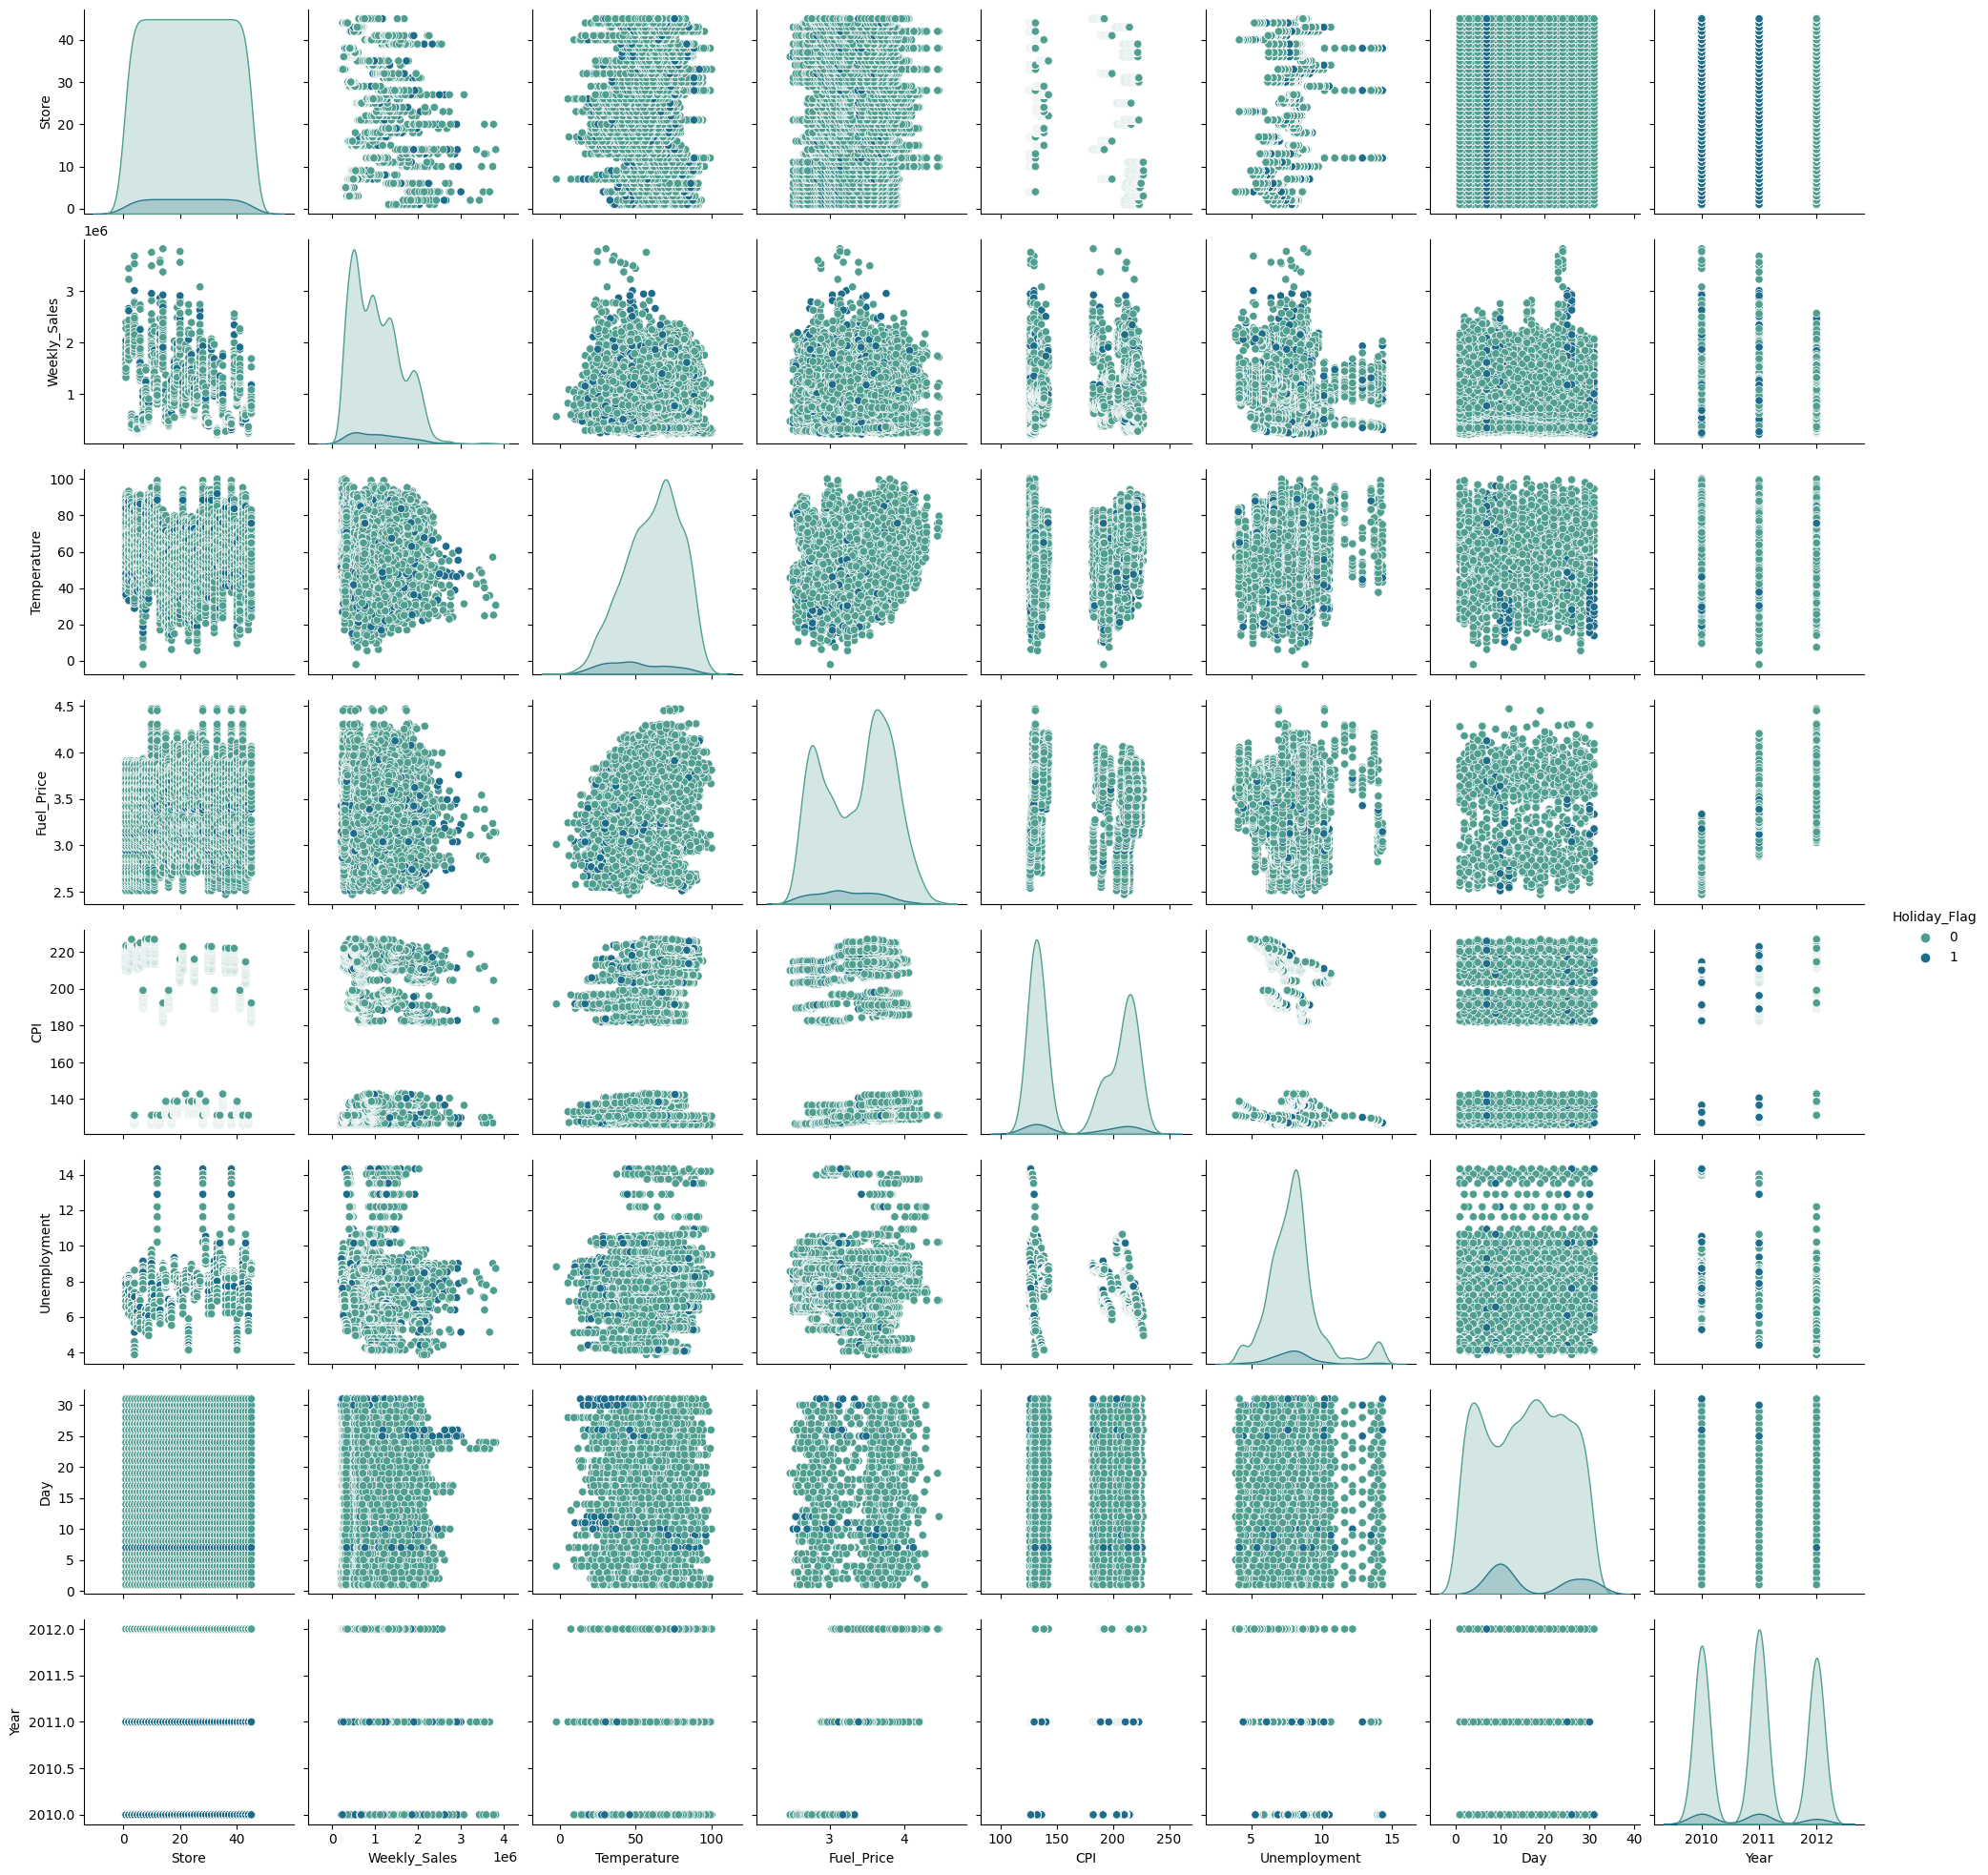

In [29]:
sns.pairplot(df.drop(columns=['Date']), hue="Holiday_Flag", palette='crest')

**Correlation between numerical columns**

In [30]:
df_corr = df.drop(columns=['Date', 'Month']).corr()
df_corr

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Year
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531,1.478526e-15,3.474318e-12
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176,-1.740946e-02,-1.837754e-02
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960,4.452608e-02,-5.678257e-02
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158,2.697332e-02,6.426923e-02
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684,2.807253e-02,7.794703e-01
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020,2.684300e-03,7.479573e-02
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000,-4.233293e-03,-2.418135e-01
Day,1.478526e-15,-0.017409,4.452608e-02,0.026973,0.028073,0.002684,-0.004233,1.000000e+00,6.405867e-03
Year,3.474318e-12,-0.018378,-5.678257e-02,0.064269,0.779470,0.074796,-0.241813,6.405867e-03,1.000000e+00


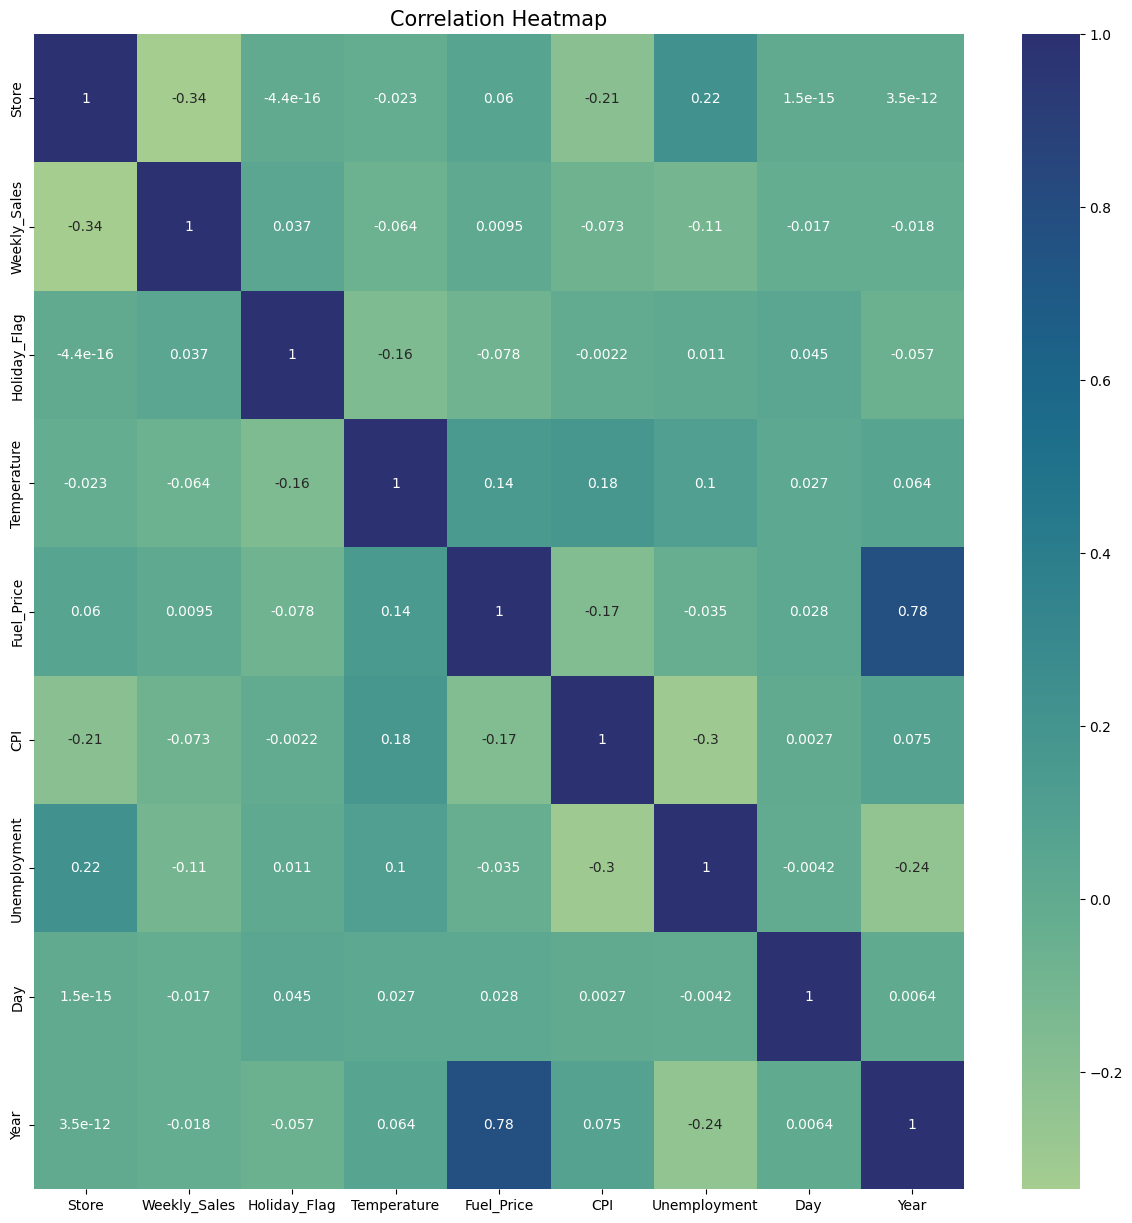

In [31]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, annot=True, cmap='crest')
plt.title('Correlation Heatmap', fontsize=15)
plt.show()


In the correlation matrix of the dataset, the highest correlation coefficient of 0.78 suggests a moderately strong positive relationship between fuel prices and the year it happens. This implies that fuel prices tend to increase over the years.

## Hypothesis Testing

**Formulating Hypotheses**

`H1` — Weeks with higher temperatures have higher sales.

Warmer temperatures may lead to increased foot traffic and consumer spending, particularly in categories like outdoor products, beverages, or seasonal items. Therefore, the hypothesis suggests that higher temperatures coincide with higher sales figures across the dataset.

`H2` — Stores in regions with lower unemployment rates have higher sales.

It assumes that areas with lower unemployment rates may exhibit higher consumer confidence and disposable income, which could translate to increased purchasing power and higher sales volumes. Conversely, regions with higher unemployment rates may experience decreased consumer spending, leading to lower sales figures.

`H3` — Holiday weeks experience significantly higher sales compared to non-holiday weeks.

Special holiday events and occasions may stimulate increased consumer demand and spending, resulting in higher sales during holiday weeks compared to non-holiday weeks. Factors such as promotional offers, festive atmosphere, and extended shopping hours during holidays are expected to contribute to the observed difference in sales performance between the two types of weeks.

**Formal Significance Test**

In this report, we would like to to test the hypothesis of `H3`. To do this, let _μ<sub>1</sub>_ represent the population mean of the temperature variable, and _μ<sub>2</sub>_ represent the population mean of the weekly sales variable.

$ 𝐻_{0}:\mu_{1} ≤ \mu_{2} $ Holiday weeks don't experience significantly higher sales compared to non-holiday weeks. \
$ 𝐻_{1}:\mu_{1}>\mu_{2} $ Holiday weeks experience significantly higher sales compared to non-holiday weeks.

We will choose 5% significance level. Therefore, our $ \alpha=0.05 $. Since we have a 2-tailed test, we have to divide $\alpha$ by 2, which gives us 0.025. So, if the calculated $\rho$-value is less than $\alpha$, we will reject the null hypothesis.

<img src='hypothesis_testing.png'>

Rename the holiday flag column

In [32]:
df.rename(columns={'Holiday_Flag': 'isHoliday'}, inplace=True)
df.head()

,Store,Date,Weekly_Sales,isHoliday,Temperature,Fuel_Price,CPI,Unemployment,Day,Year,Month
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,2010,February
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,12,2010,February
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2010,February
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2010,February
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,5,2010,March


Change the isHoliday column to a categorical variable

In [33]:
mapping = {0: 'No', 1: 'Yes'}
df['isHoliday'] = df['isHoliday'].map(mapping)
df.head()

,Store,Date,Weekly_Sales,isHoliday,Temperature,Fuel_Price,CPI,Unemployment,Day,Year,Month
0,1,2010-02-05,1643690.90,No,42.31,2.572,211.096358,8.106,5,2010,February
1,1,2010-02-12,1641957.44,Yes,38.51,2.548,211.242170,8.106,12,2010,February
2,1,2010-02-19,1611968.17,No,39.93,2.514,211.289143,8.106,19,2010,February
3,1,2010-02-26,1409727.59,No,46.63,2.561,211.319643,8.106,26,2010,February
4,1,2010-03-05,1554806.68,No,46.50,2.625,211.350143,8.106,5,2010,March


Getting all observations for holiday and non-holiday weeks

In [34]:
holiday = df.loc[df.isHoliday == "Yes"]
non_holiday = df.loc[df.isHoliday == "No"]

Select weekly sales data for holiday and non-holiday weeks

In [35]:
holiday_sales = holiday.Weekly_Sales
non_holiday_sales = non_holiday.Weekly_Sales

Plot the distribution of weekly sales

Text(0.5, 1.0, 'Holiday vs Non-Holiday Sales Distribution')

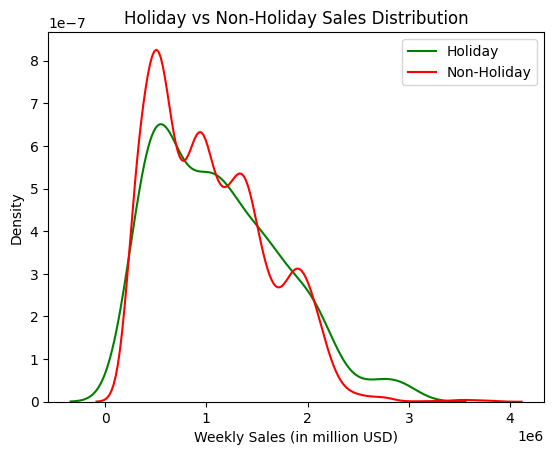

In [36]:
sns.kdeplot(holiday_sales, color='green')
sns.kdeplot(non_holiday_sales, color='red')
plt.legend(['Holiday', 'Non-Holiday'])
plt.xlabel('Weekly Sales (in million USD)')
plt.title('Holiday vs Non-Holiday Sales Distribution')

Calculating the mean of weekly sales for holiday and non-holiday weeks

In [37]:
holiday.Weekly_Sales.mean()

1122887.8923555557

In [38]:
non_holiday.Weekly_Sales.mean()

1041256.3802088555

Determine t-value and p-value.

In [39]:
alpha = 0.05
t_value1, p_value1 = stats.ttest_ind(holiday_sales, non_holiday_sales)
print("t_value1 = ",t_value1, ", p_value1 = ", p_value1)

t_value1 =  2.9608919093259036 , p_value1 =  0.003078699263818616


Conclusion about the hypothesis

In [40]:
if p_value1 < alpha:
    print("Conclusion: since p_value {} is less than alpha {} ". format (p_value1,alpha))
    print("Reject the null hypothesis.")
    print("Holiday weeks experience significantly higher sales compared to non-holiday weeks.")
    
else:
    print("Conclusion: since p_value {} is greater than alpha {} ". format (p_value1,alpha))
    print("Fail to reject the null hypothesis.")
    print("Holiday weeks don't experience significantly higher sales compared to non-holiday weeks.")

Conclusion: since p_value 0.003078699263818616 is less than alpha 0.05 
Reject the null hypothesis.
Holiday weeks experience significantly higher sales compared to non-holiday weeks.


## Conclusion

**Suggestions for Next Steps**
- Perform time series analysis to identify any trends or seasonal patterns.
- Utilize machine learning algorithms for predictive modeling, such as forecasting future sales.
- Conduct market segmentation analysis to understand the characteristics of high-performing stores.
- Explore potential interactions between different variables on sales.

**Analysis Summary**

Overall, the dataset appears to be comprehensive, covering relevant attributes for sales analysis. However, its quality could be improved with additional variables like food categories, tax information, etc. These enhancements would offer a more comprehensive understanding of sales dynamics. Moreover, including data on promotions, competitor activities, and store-specific characteristics would enhance the analysis further.